## 필요라이브러 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [3]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [5]:
os.listdir()[:5]

['100',
 'crawled_data',
 'day_bugs.ipynb',
 'day_genie.ipynb',
 'day_soribada.ipynb']

In [6]:
path = 'crawled_data/live_flo'
os.chdir(path)

['live_bugs_20220422_105549.xlsx', 'live_bugs_20220425_110806.xlsx']

In [21]:
file_list = os.listdir()
file_list

['live_bugs_20220422_105549.xlsx', 'live_bugs_20220425_110806.xlsx']

In [7]:
len(file_list)

2

# 수집한 파일 모두 합치기

In [8]:
start_date = '2022-04-18'
end_date = '2022-04-24'

In [9]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-22,1,LOVE DIVE,IVE (아이브),LOVE DIVE
1,2022-04-22,2,Seoul,볼빨간사춘기,Seoul
2,2022-04-22,3,그대가 있기에,노을,그대가 있기에
3,2022-04-22,4,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
4,2022-04-22,5,Love story,볼빨간사춘기,Seoul


In [10]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-22,1,LOVE DIVE,IVE (아이브),LOVE DIVE
1,2022-04-22,2,Seoul,볼빨간사춘기,Seoul
2,2022-04-22,3,그대가 있기에,노을,그대가 있기에
3,2022-04-22,4,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
4,2022-04-22,5,Love story,볼빨간사춘기,Seoul


In [11]:
sliced_df.tail()

,날짜,순위,곡,가수,앨범
95,2022-04-22,96,너의 우주는 (Universe_),원위 (ONEWE),Planet Nine : VOYAGER
96,2022-04-22,97,Greatest Love of All,Whitney Houston(휘트니 휴스턴),Whitney Houston (The Deluxe Anniversary Edition)
97,2022-04-22,98,어머님께,지오디(god),Chapter 1
98,2022-04-22,99,야행성 (Regulus),원위 (ONEWE),2/4
99,2022-04-22,100,별 보러 가자,박보검,별 보러 가자


In [12]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      100 non-null    object
 1   순위      100 non-null    int64 
 2   곡       100 non-null    object
 3   가수      100 non-null    object
 4   앨범      100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [13]:
len(sliced_df['곡'].unique())

99

In [14]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

,날짜
0,2022-04-18
1,2022-04-19
2,2022-04-20
3,2022-04-21
4,2022-04-22
5,2022-04-23
6,2022-04-24


### 순위변동 열 추가한 df 생성

In [15]:
song_df_list = []
for one in sliced_df['곡'].unique():
    one_df = sliced_df[sliced_df['곡'] == one].reset_index(drop=True)
    one_df['순위변동'] = one_df['순위'] - one_df['순위'].shift(1)
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    song_df_list.append(merged_df)

In [16]:
len(song_df_list)

99

## 몇 개씩 묶어서 노래 시각화

In [17]:
import math

### 순위 그래프

In [18]:
def rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(12, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ':' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label)
        t =  t + number
        plt.title(f'{t-(number-1)}~{t}번째 노래')
        plt.legend(framealpha=0.5)
        plt.show()

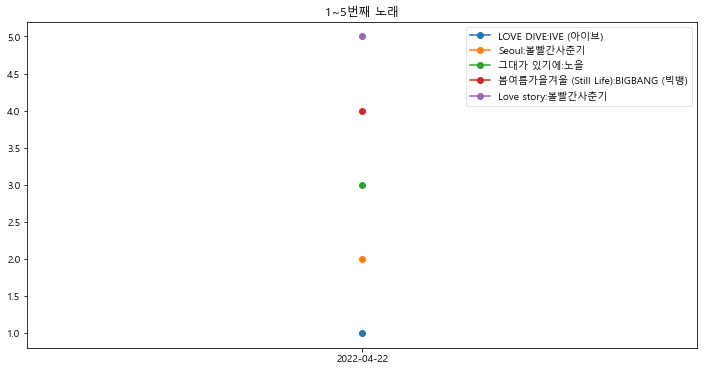

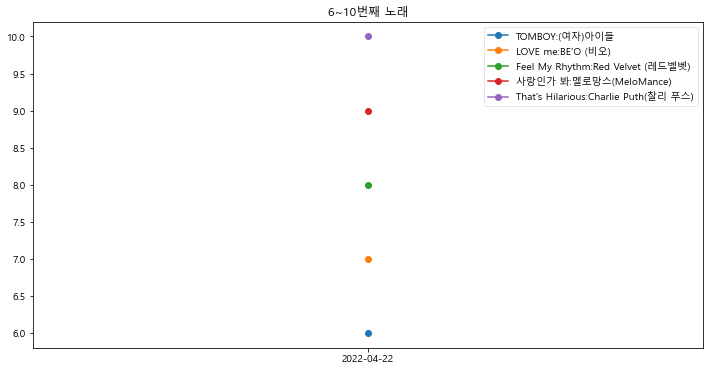

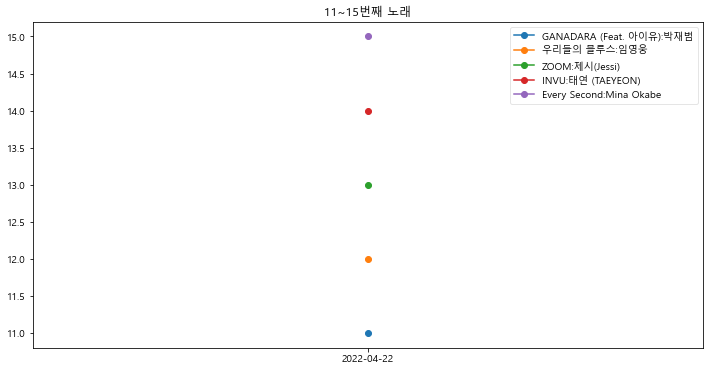

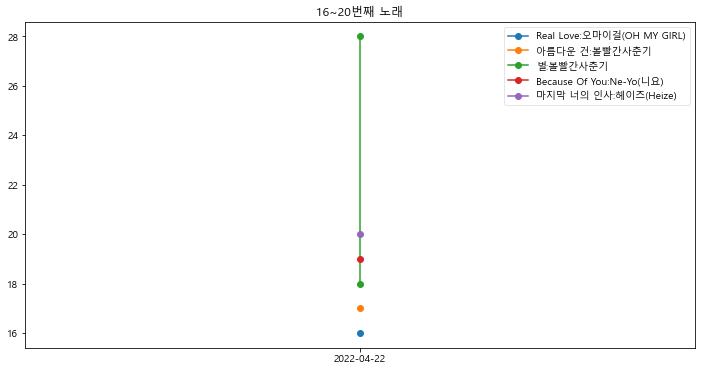

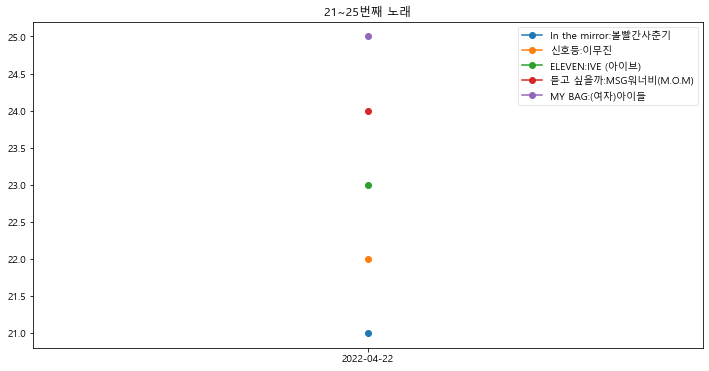

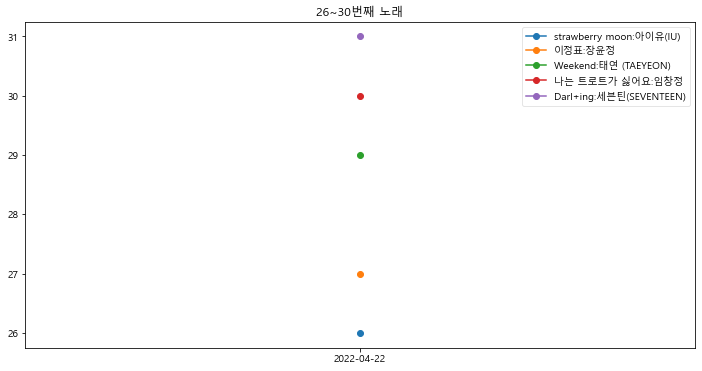

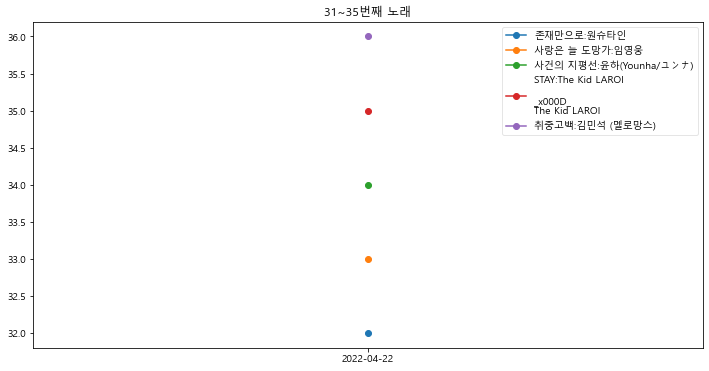

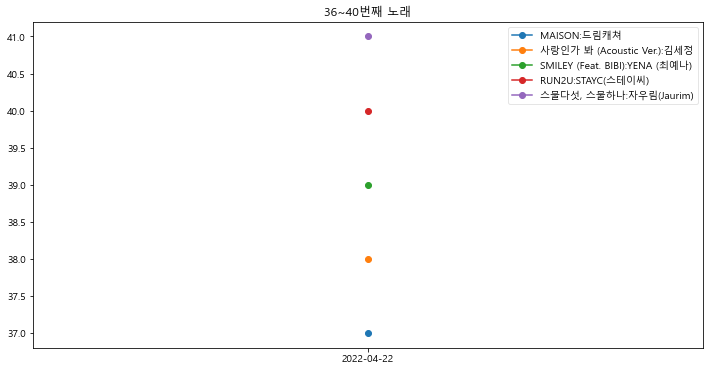

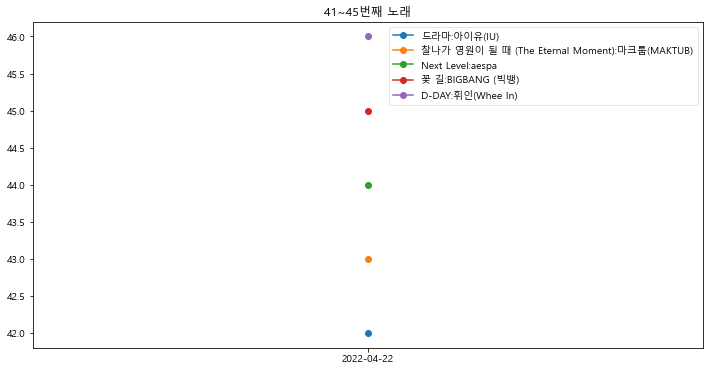

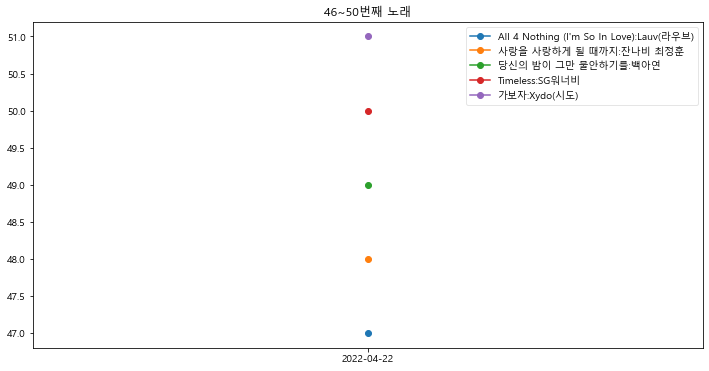

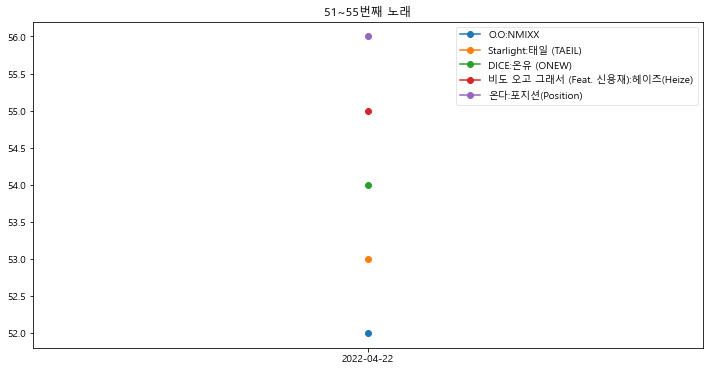

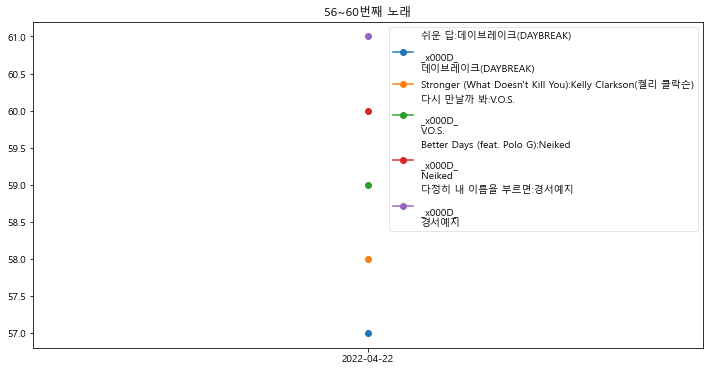

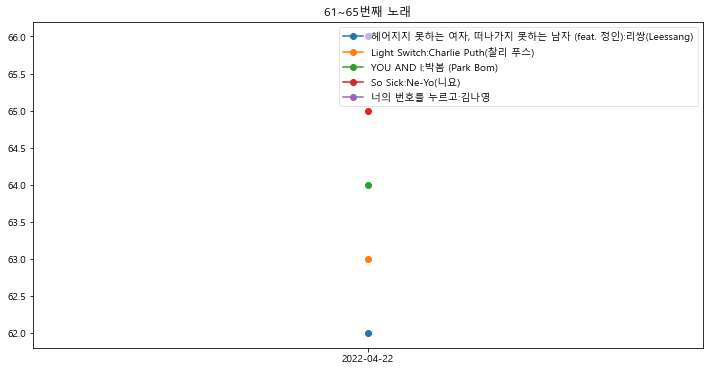

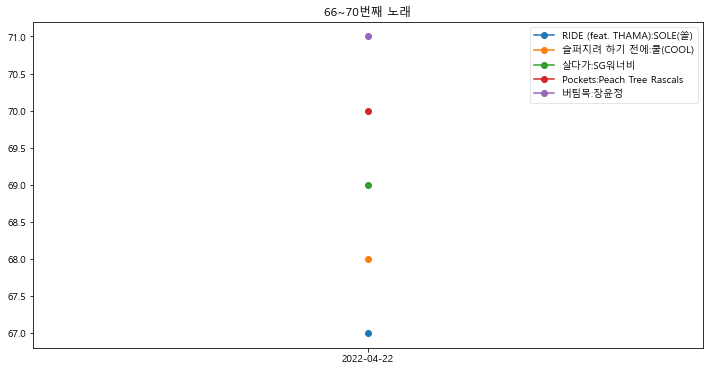

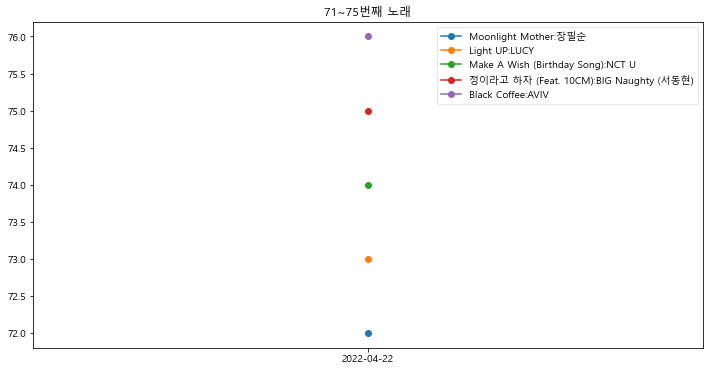

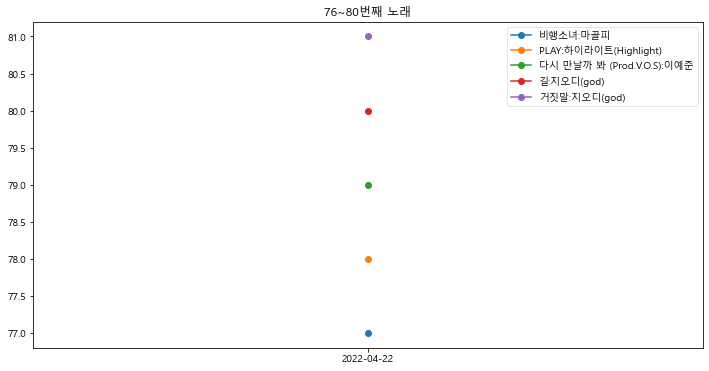

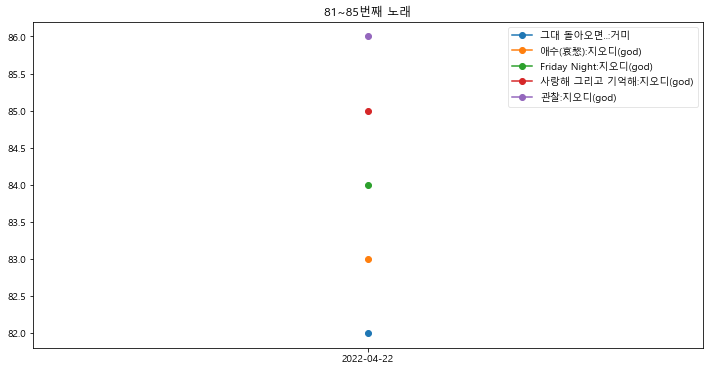

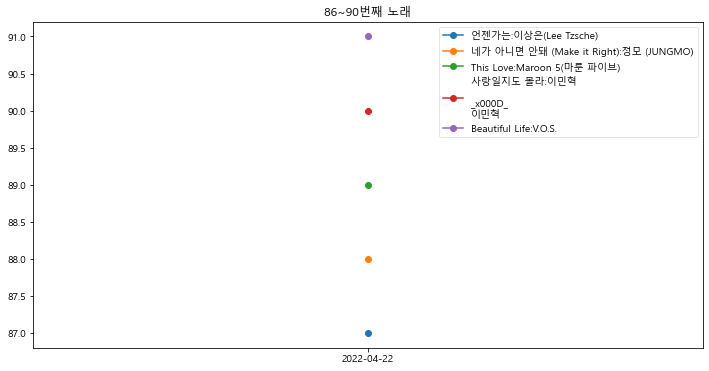

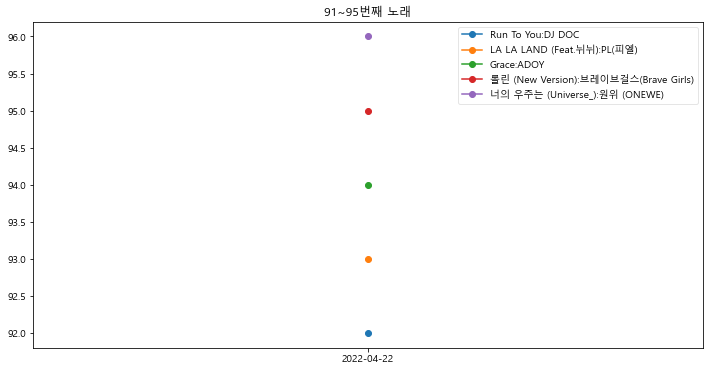

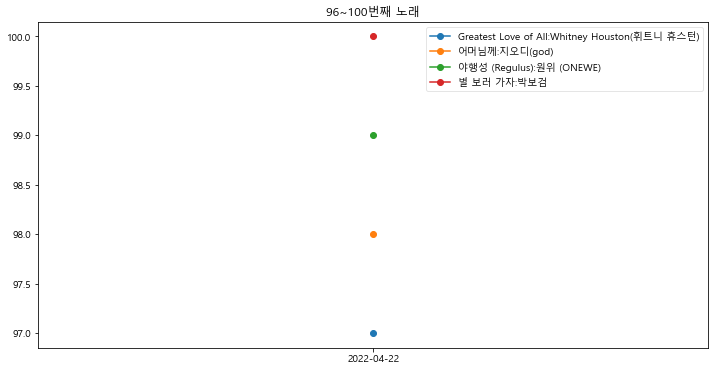

In [19]:
rank_graph(song_df_list, 5)

### 순위 변동 그래프

In [248]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(12, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ':' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label)
        t =  t + number
        plt.title(f'{t-(number-1)}~{t}번째 노래')
        plt.legend(framealpha=0.5)
        plt.show()

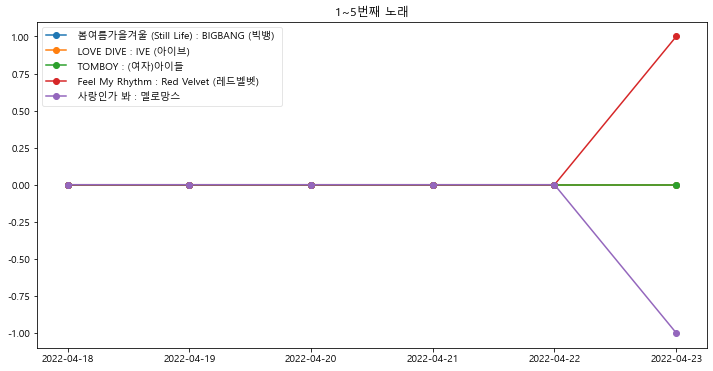

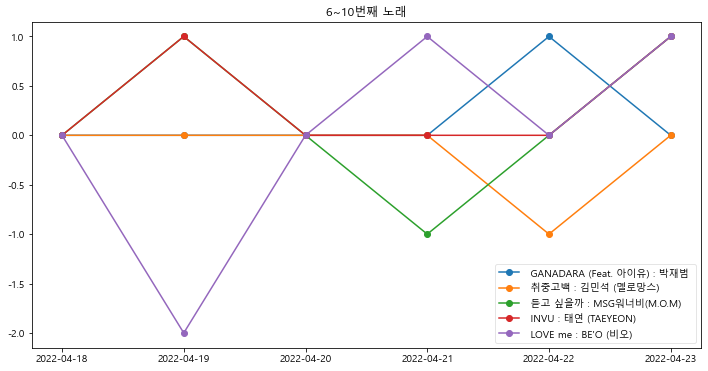

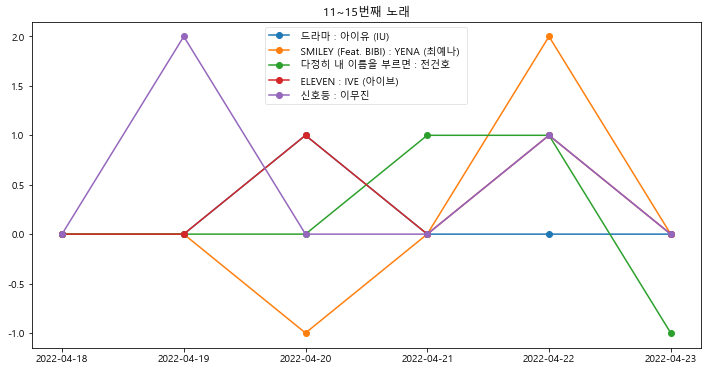

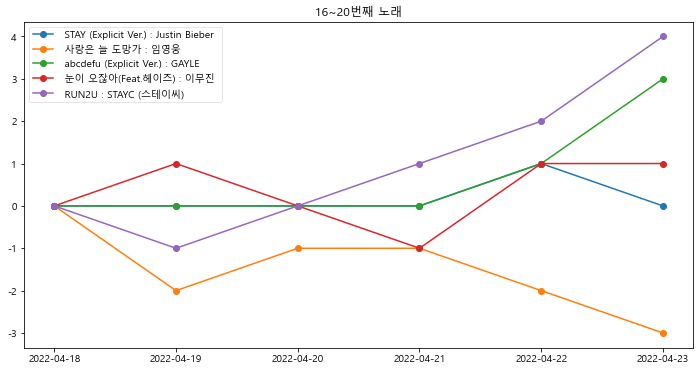

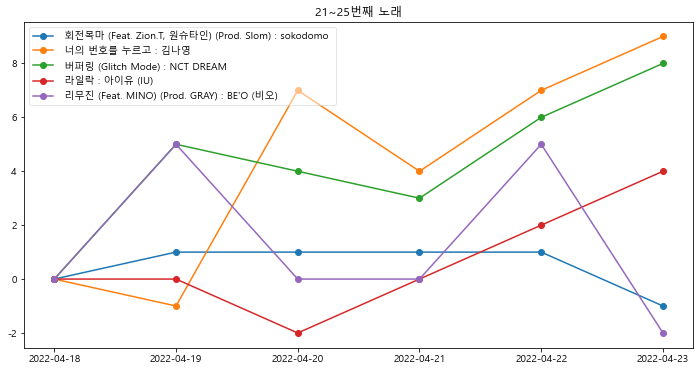

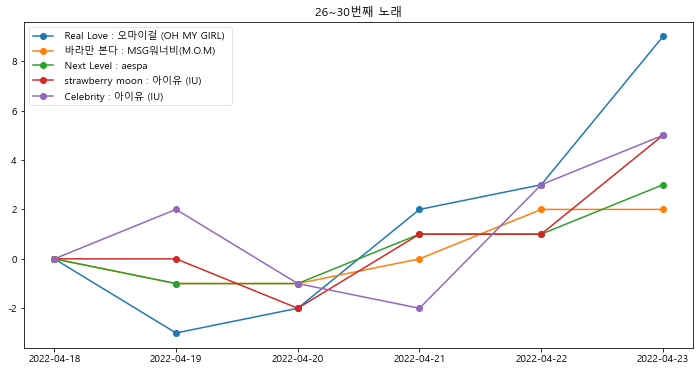

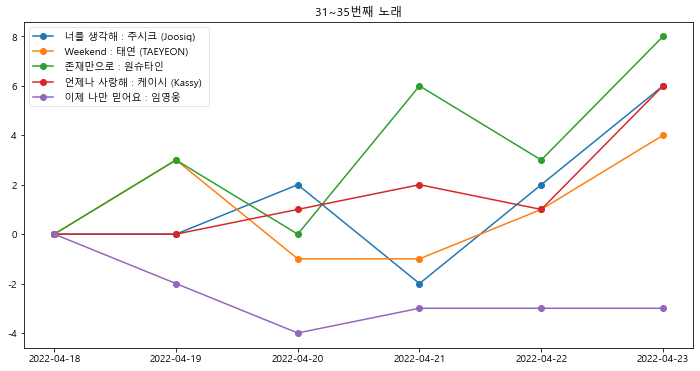

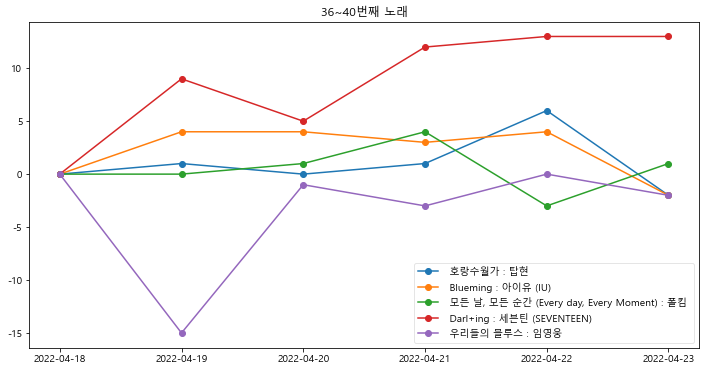

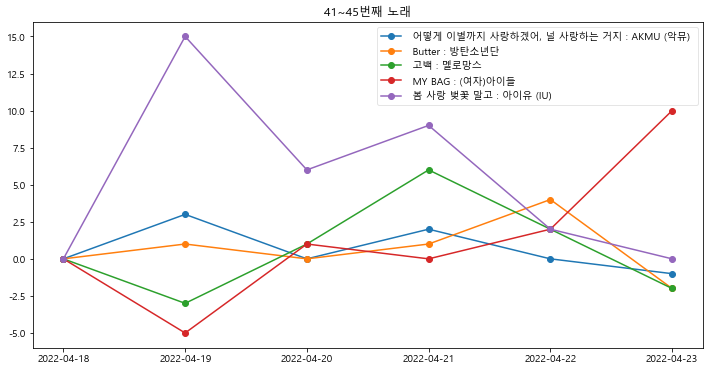

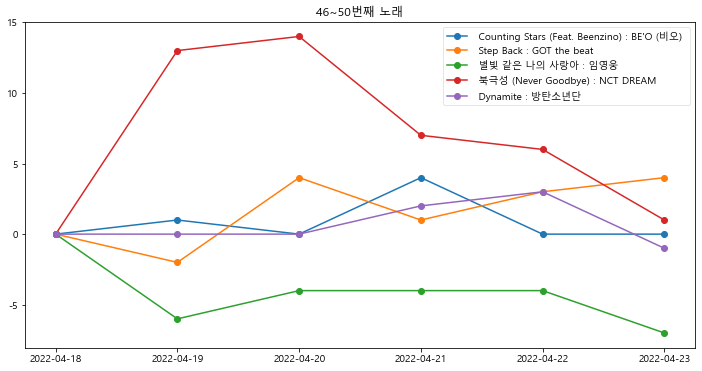

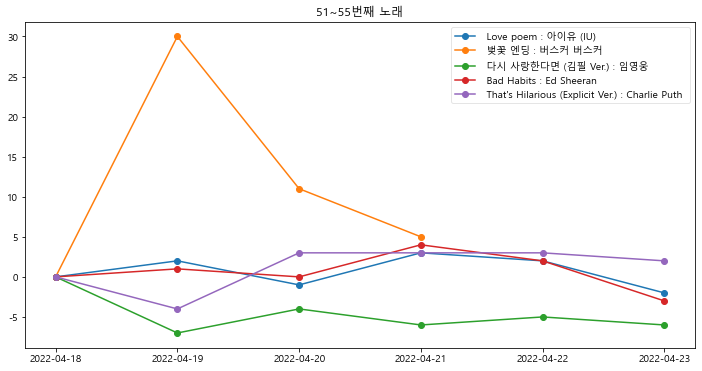

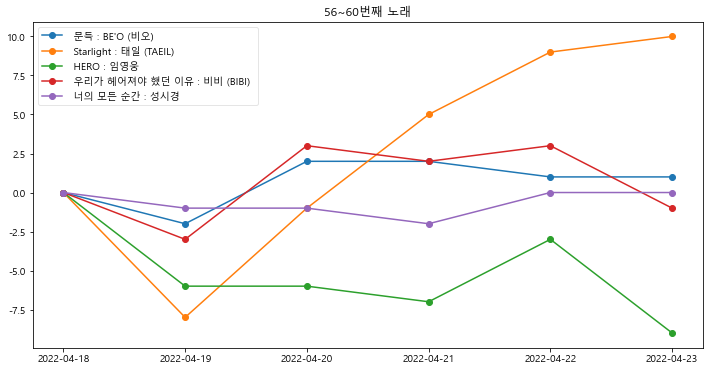

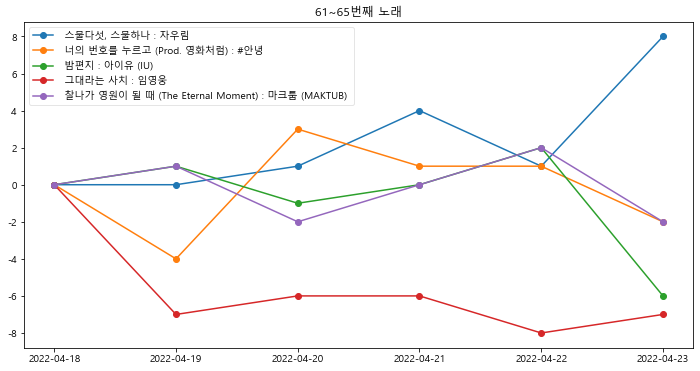

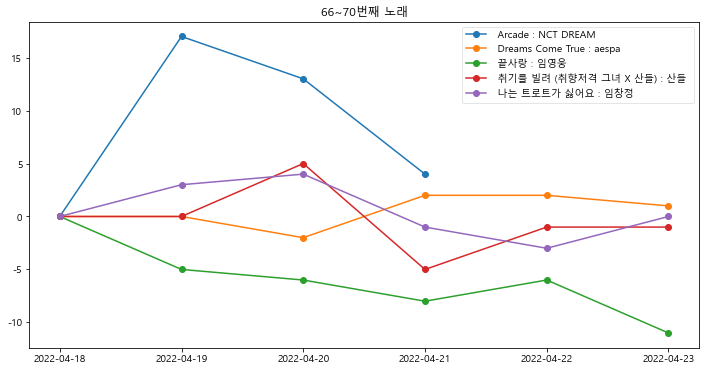

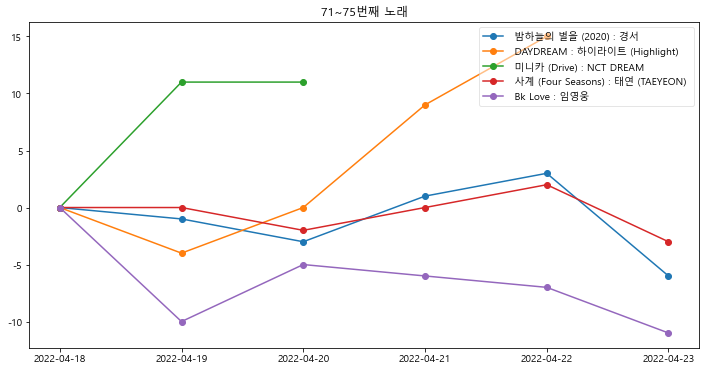

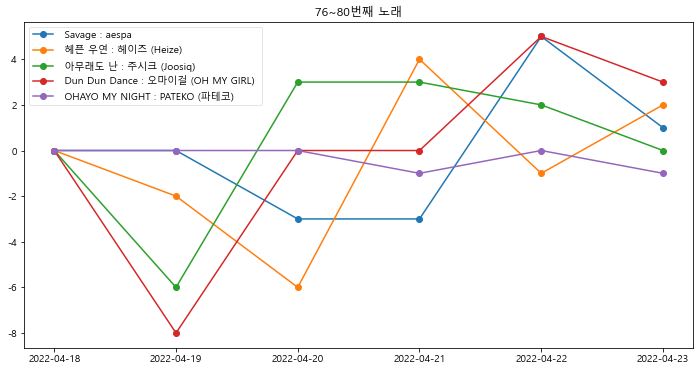

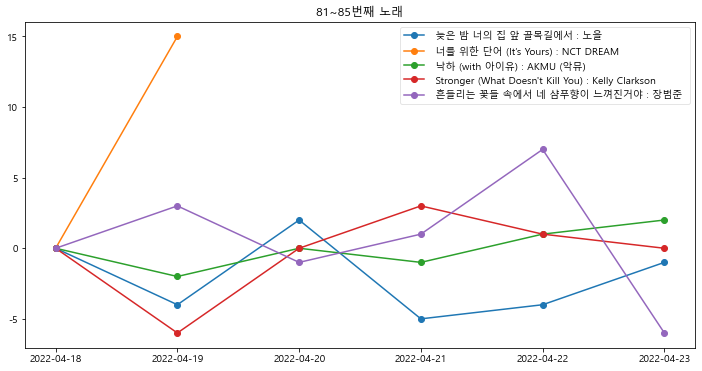

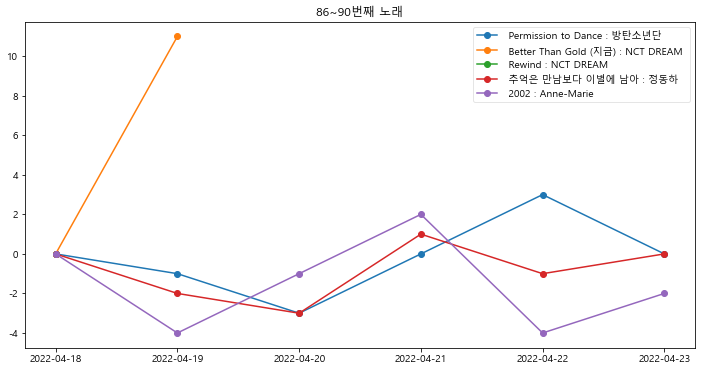

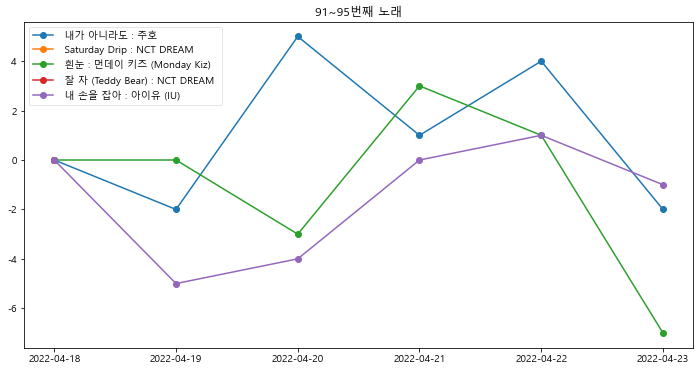

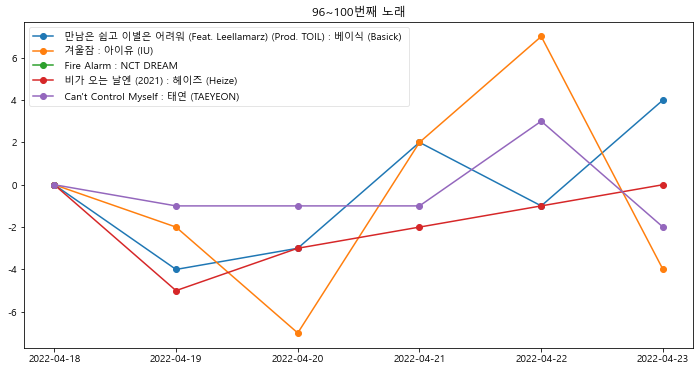

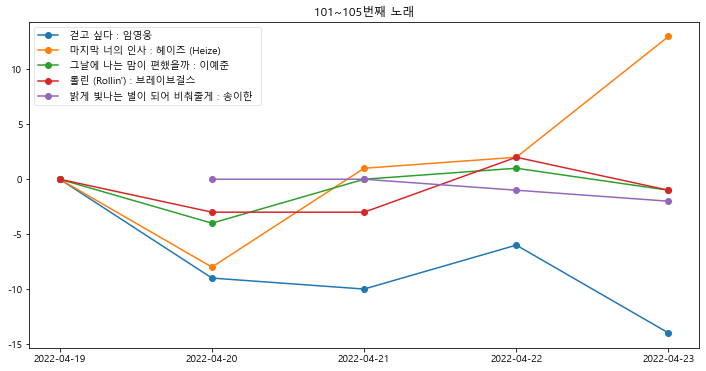

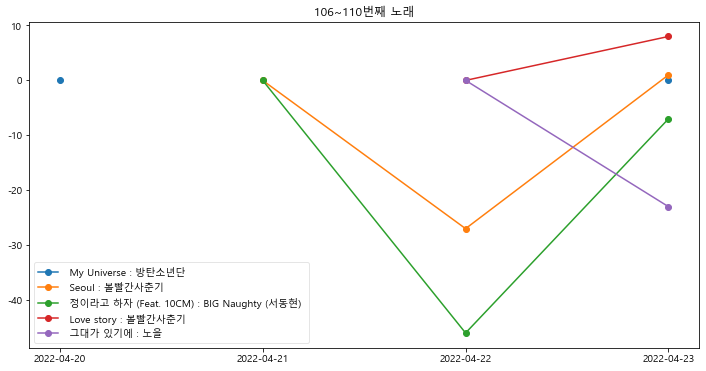

In [249]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

In [185]:
song_df_list[106].head()

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-21,41,Seoul,볼빨간사춘기,Seoul,0.0
1,2022-04-22,14,Seoul,볼빨간사춘기,Seoul,-27.0
2,2022-04-23,15,Seoul,볼빨간사춘기,Seoul,1.0


In [186]:
song_df_list[107].head()

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-21,96,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),정이라고 하자,0.0
1,2022-04-22,50,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),정이라고 하자,-46.0
2,2022-04-23,43,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),정이라고 하자,-7.0


In [187]:
song_df_list[108].head()

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-22,58,Love story,볼빨간사춘기,Seoul,0.0
1,2022-04-23,66,Love story,볼빨간사춘기,Seoul,8.0


In [188]:
song_df_list[109].head()

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-22,91,그대가 있기에,노을,그대가 있기에,0.0
1,2022-04-23,68,그대가 있기에,노을,그대가 있기에,-23.0


# 코드 마지막